In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline



In [3]:

df = pd.read_csv("Loan_default.csv")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and missing values:")
display(df.info())
print("\nMissing values per column:")
print(df.isnull().sum().sum())  # Should be 0

Dataset shape: (255347, 18)

First 5 rows:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 n

None


Missing values per column:
0


DEFAULT RATE
Overall default rate: 11.61%


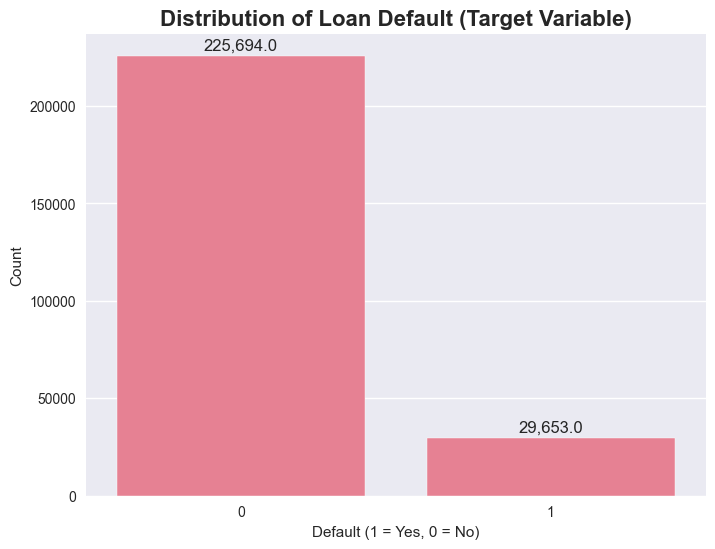

In [4]:

print("DEFAULT RATE")
default_rate = df['Default'].mean() * 100
print(f"Overall default rate: {default_rate:.2f}%")

plt.figure(figsize=(8,6))
ax = sns.countplot(x='Default', data=df, order=[0,1])
plt.title('Distribution of Loan Default (Target Variable)', fontsize=16, fontweight='bold')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.4, p.get_height()+3000), ha='center', fontsize=12)
plt.show()

In [5]:

numeric_cols = df.select_dtypes(include=np.number).columns.drop('Default')
desc_stats = df[numeric_cols].describe().T
desc_stats = desc_stats[['min', '25%', '50%', '75%', 'mean', 'std']]
desc_stats.columns = ['Minimum', 'Q1', 'Median', 'Q3', 'Mean', 'Std Dev']
desc_stats = desc_stats.round(2)

print("DESCRIPTIVE STATISTICS FOR NUMERIC VARIABLES")
display(desc_stats)

DESCRIPTIVE STATISTICS FOR NUMERIC VARIABLES


,Minimum,Q1,Median,Q3,Mean,Std Dev
Age,18.0,31.00,43.00,56.00,43.50,14.99
Income,15000.0,48825.50,82466.00,116219.00,82499.30,38963.01
LoanAmount,5000.0,66156.00,127556.00,188985.00,127578.87,70840.71
CreditScore,300.0,437.00,574.00,712.00,574.26,158.90
MonthsEmployed,0.0,30.00,60.00,90.00,59.54,34.64
NumCreditLines,1.0,2.00,2.00,3.00,2.50,1.12
InterestRate,2.0,7.77,13.46,19.25,13.49,6.64
LoanTerm,12.0,24.00,36.00,48.00,36.03,16.97
DTIRatio,0.1,0.30,0.50,0.70,0.50,0.23


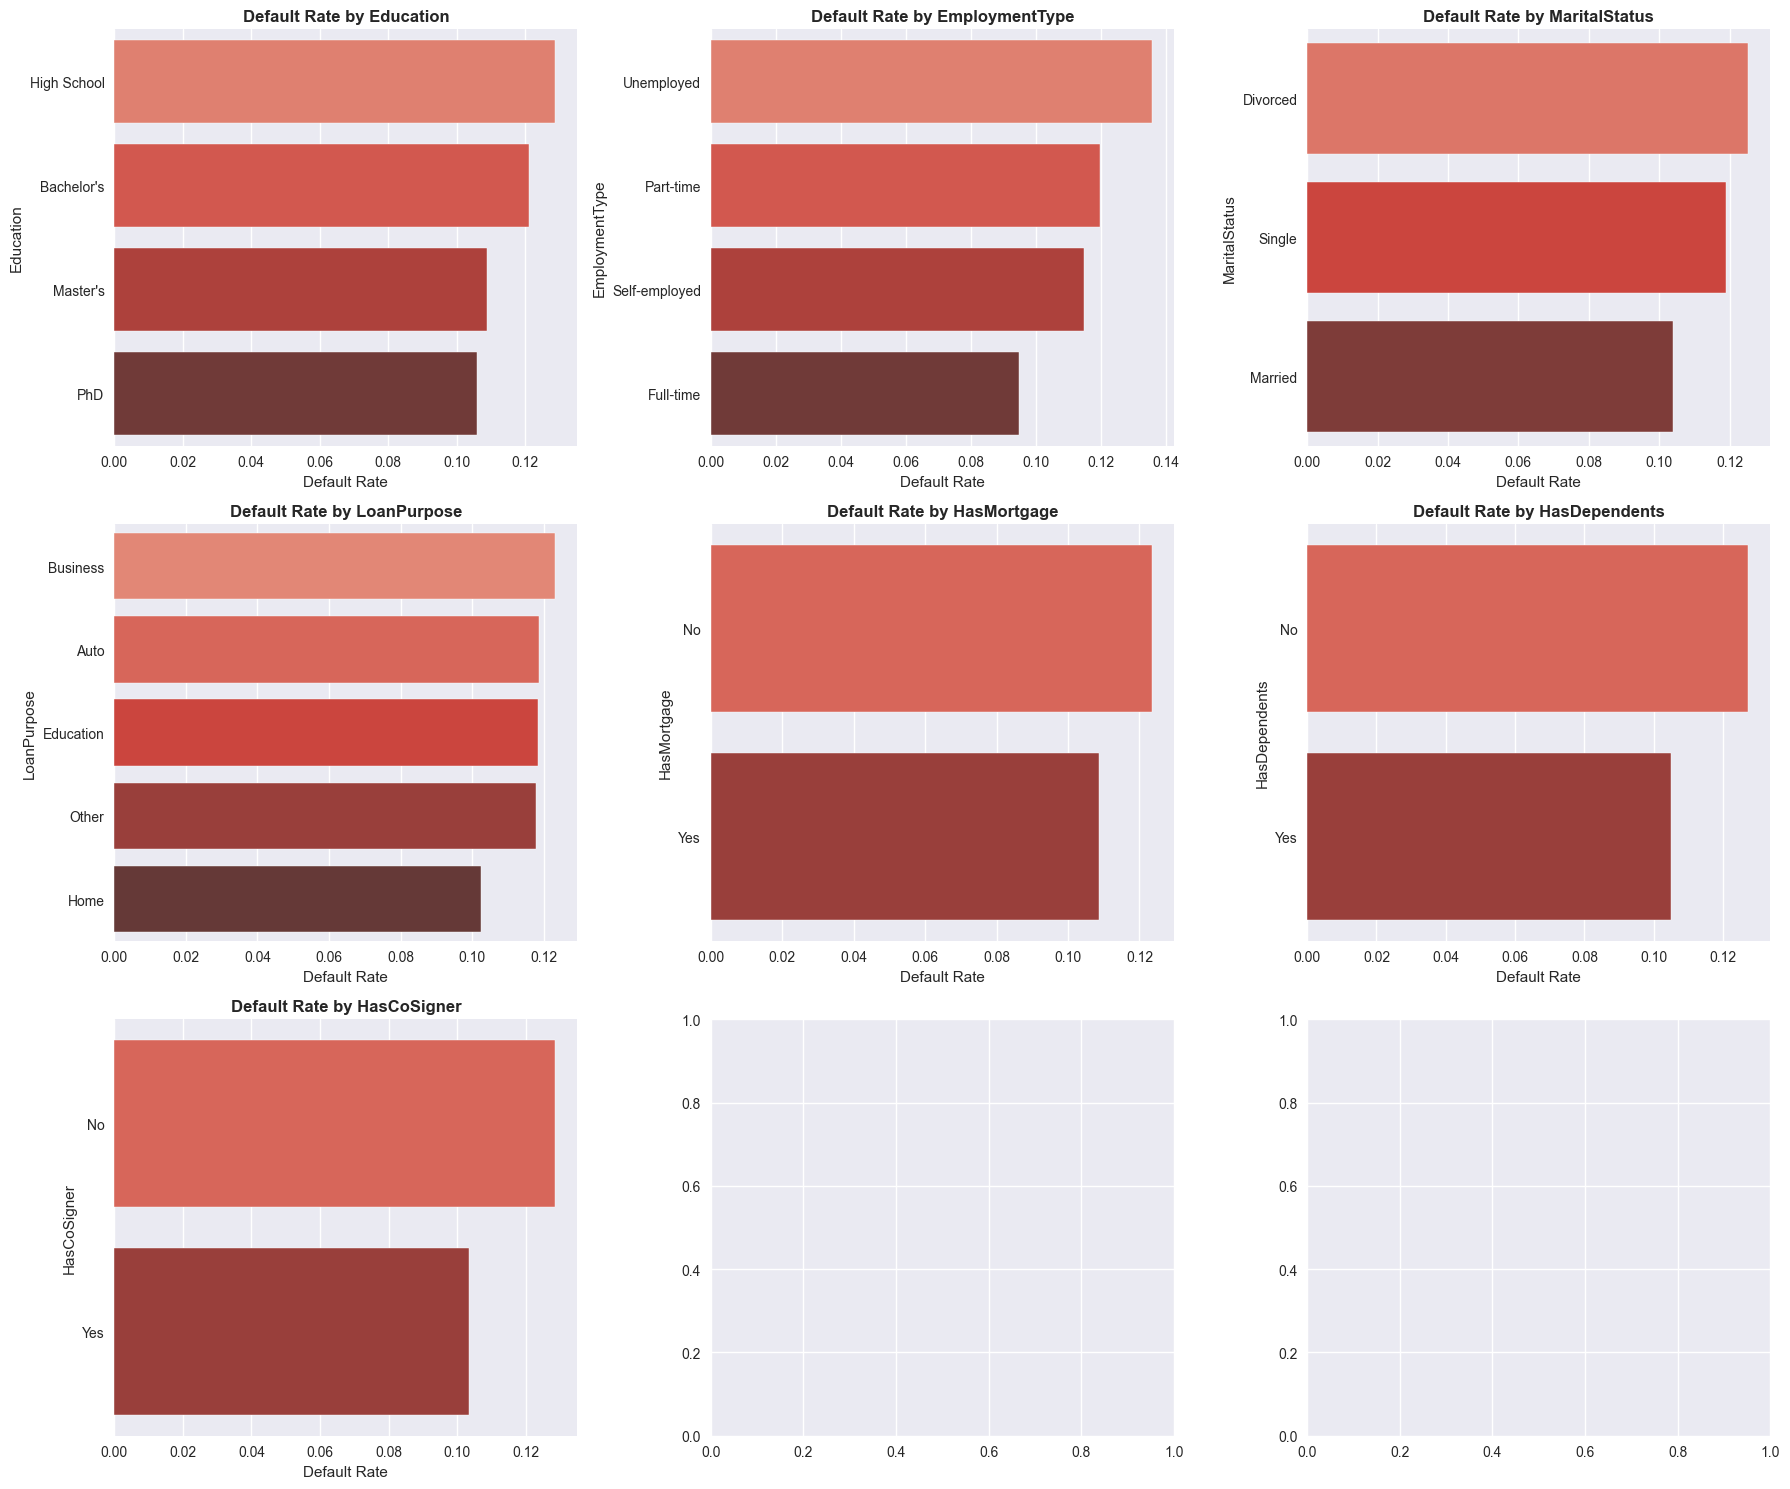

In [7]:
# CELL 6: Default Rate by Categorical Variables (Key Insight Plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()
for i, col in enumerate(cat_cols):
    default_by_cat = df.groupby(col)['Default'].mean().sort_values(ascending=False)
    sns.barplot(x=default_by_cat.values, y=default_by_cat.index, ax=axes[i], palette="Reds_d")
    axes[i].set_title(f'Default Rate by {col}', fontweight='bold')
    axes[i].set_xlabel('Default Rate')
plt.tight_layout()
plt.show()

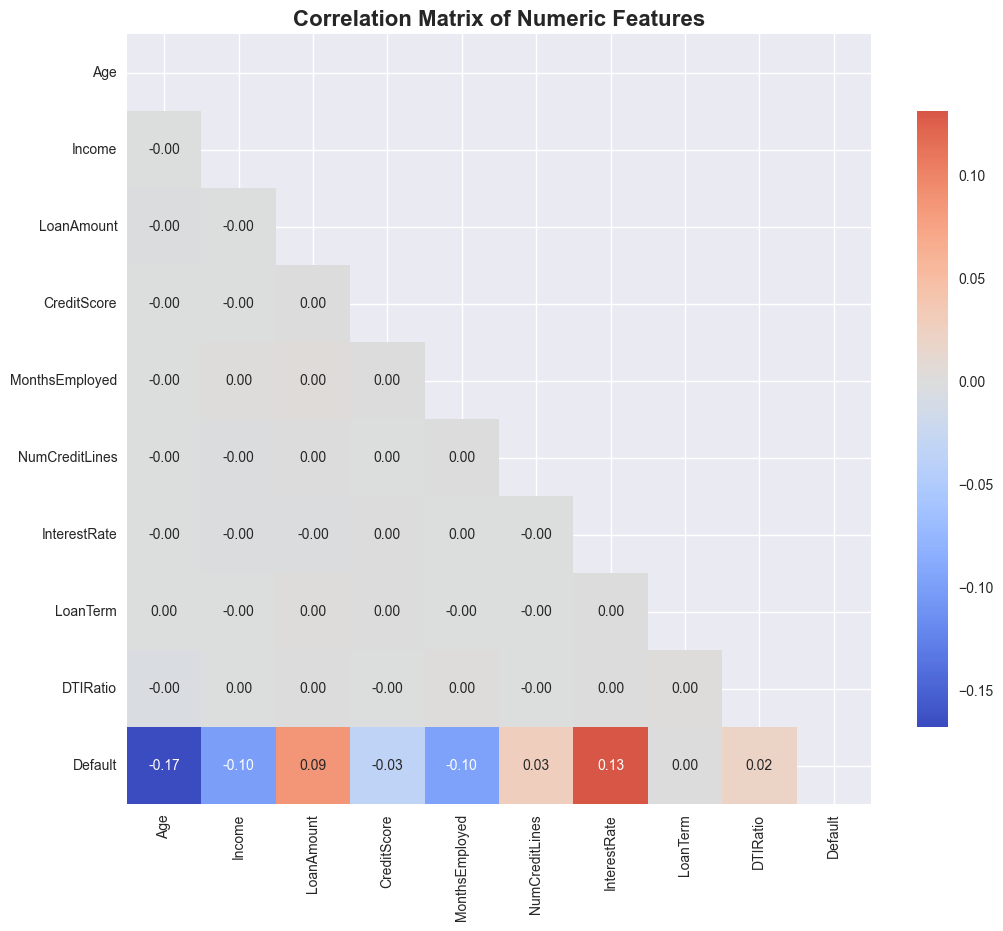

In [8]:
# CELL 7: Correlation Heatmap (Numeric Variables Only)
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, mask=mask, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
plt.show()

In [10]:
# CELL 8: Data Preprocessing & One-Hot Encoding
df_clean = df.drop('LoanID', axis=1).copy()

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True, dtype=int)

display(df_clean.head(10).style
        .set_table_attributes("style='display:inline'")
        .set_caption("Final Dataset Ready for Logistic Regression")
        .background_gradient(cmap='Blues', low=0.3, high=0.9))

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.230000,36,0.440000,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.810000,60,0.680000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.170000,24,0.310000,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.070000,24,0.230000,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.510000,48,0.730000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,25,90298,90448,720,18,2,22.720000,24,0.100000,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1
6,38,111188,177025,429,80,1,19.110000,12,0.160000,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1
7,56,126802,155511,531,67,4,8.150000,60,0.430000,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
8,36,42053,92357,827,83,1,23.940000,48,0.200000,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
9,40,132784,228510,480,114,4,9.090000,48,0.330000,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1


In [11]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df_clean.drop('Default', axis=1)
y = df_clean['Default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=530, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} rows")
print(f"Test set:     {X_test.shape[0]:,} rows")
print(f"Default rate in train: {y_train.mean():.4f}")
print(f"Default rate in test:  {y_test.mean():.4f}")

Training set: 204,277 rows
Test set:     51,070 rows
Default rate in train: 0.1161
Default rate in test:  0.1161


In [17]:
# CELL 10: Fit Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

log_model = LogisticRegression(max_iter=1000, random_state=530)
log_model.fit(X_train, y_train)

print("Logistic Regression Model Trained Successfully!")

Logistic Regression Model Trained Successfully!


In [18]:
# CELL 11: Model Evaluation on Test Set
y_prob = log_model.predict_proba(X_test)[:, 1]
y_pred_optimal = (y_prob >= 0.11).astype(int)
print("With optimal threshold = 0.11:")
print(classification_report(y_test, y_pred_optimal))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred_optimal))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

With optimal threshold = 0.11:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     45139
           1       0.21      0.71      0.32      5931

    accuracy                           0.65     51070
   macro avg       0.58      0.68      0.55     51070
weighted avg       0.86      0.65      0.72     51070

CONFUSION MATRIX
[[29254 15885]
 [ 1737  4194]]

ROC-AUC Score: 0.7424


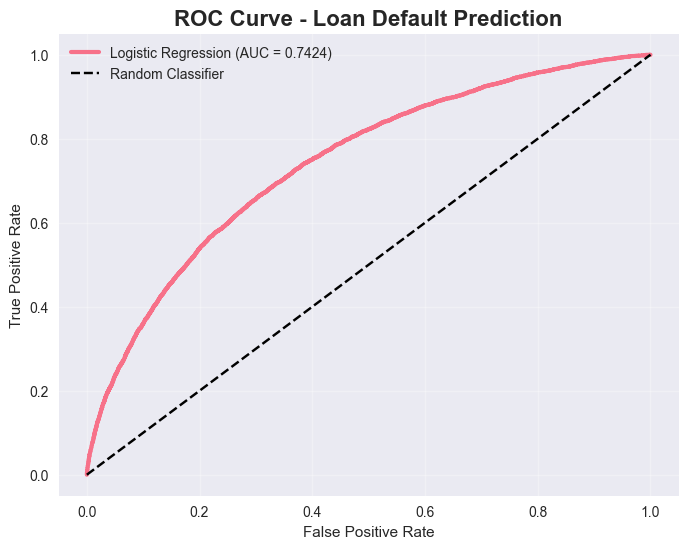

In [19]:
# CELL 12: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})', linewidth=3)
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Loan Default Prediction', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

=== TOP 10 PREDICTORS OF DEFAULT (by Odds Ratio) ===


,Feature,Coefficient,Odds_Ratio
5,NumCreditLines,0.171451,1.187026
14,EmploymentType_Unemployed,0.104127,1.109741
9,Education_High School,0.069351,1.071812
6,InterestRate,0.064561,1.066691
19,LoanPurpose_Business,0.026153,1.026498
8,DTIRatio,0.019727,1.019923
16,MaritalStatus_Single,0.017281,1.017431
12,EmploymentType_Part-time,0.014893,1.015004
20,LoanPurpose_Education,0.009009,1.009050
22,LoanPurpose_Other,0.006403,1.006423



TOP 10 PROTECTIVE FACTORS (lowest Odds Ratio)


,Feature,Coefficient,Odds_Ratio
13,EmploymentType_Self-employed,-0.010030,0.990020
4,MonthsEmployed,-0.010237,0.989815
0,Age,-0.042509,0.958382
10,Education_Master's,-0.046930,0.954154
11,Education_PhD,-0.068591,0.933708
21,LoanPurpose_Home,-0.071887,0.930636
17,HasMortgage_Yes,-0.087969,0.915789
15,MaritalStatus_Married,-0.101339,0.903627
18,HasDependents_Yes,-0.145373,0.864700
23,HasCoSigner_Yes,-0.157566,0.854221


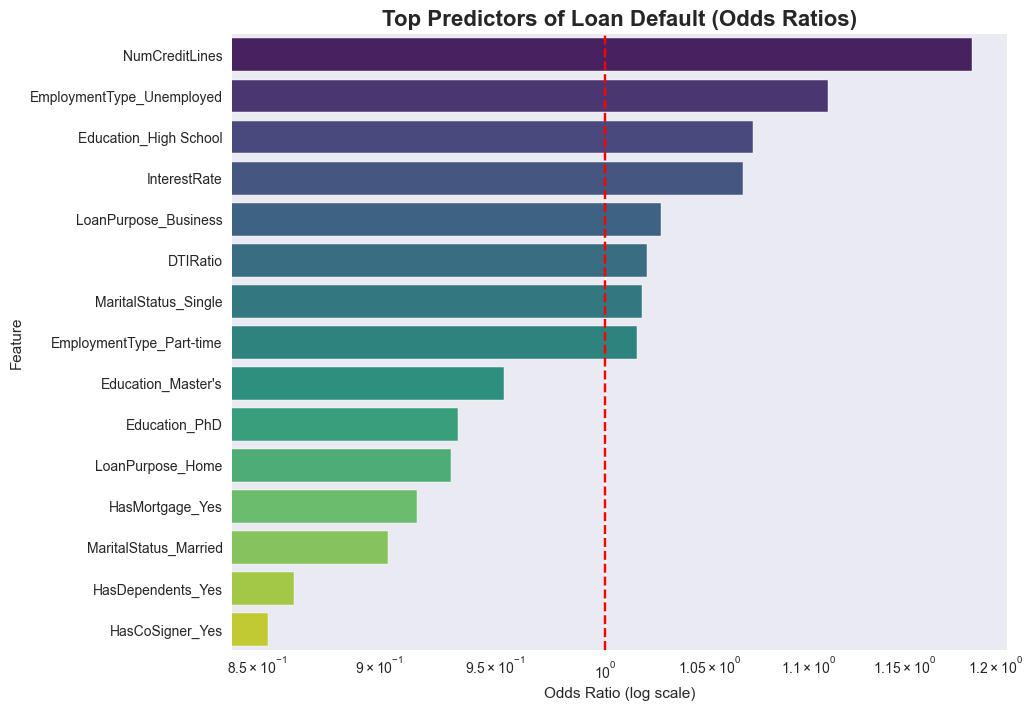

In [22]:
#Feature Importance (Odds Ratios)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0],
    'Odds_Ratio': np.exp(log_model.coef_[0])
}).sort_values(by='Odds_Ratio', ascending=False)

print("=== TOP 10 PREDICTORS OF DEFAULT (by Odds Ratio) ===")
display(coef_df.head(10))

print("\nTOP 10 PROTECTIVE FACTORS (lowest Odds Ratio)")
display(coef_df.tail(10))

# Plot top 15 most important features
top15 = pd.concat([coef_df.head(8), coef_df.tail(7)])
plt.figure(figsize=(10,8))
sns.barplot(data=top15, y='Feature', x='Odds_Ratio', palette='viridis')
plt.xscale('log')
plt.title('Top Predictors of Loan Default (Odds Ratios)', fontsize=16, fontweight='bold')
plt.xlabel('Odds Ratio (log scale)')
plt.axvline(x=1, color='red', linestyle='--')
plt.show()